# Part I - Airline delay cause dataset
## by (Mansi Kamthane)

## Introduction
> This is a large dataset; We will consider data for 20 years, 2003 to 2023, downloaded from the United States Department of Transportation website 
This dataset is based on Airline delay causes
All columns may not be importatnt


1. `year`: Represents the year of the flight data.

2. `month`: Represents the month of the flight data.

3. `carrier`: Represents the code or identifier for the airline carrier.

4. `carrier_name`: Represents the name of the airline carrier.

5. `airport`: Represents the code or identifier for the airport.

6. `airport_name`: Represents the name of the airport.

7. `arr_flights`: Represents the total number of flights that arrived.

8. `arr_del15`: Represents the number of flights that arrived delayed by 15 minutes or more.

9. `carrier_ct`: Represents the number of delayed flights attributed to the airline carrier.

10. `weather_ct`: Represents the number of delayed flights attributed to weather conditions.

11. `nas_ct`: Represents the number of delayed flights attributed to the National Aviation System (NAS), which includes air traffic control and other factors.

12. `security_ct`: Represents the number of delayed flights attributed to security-related reasons.

13. `late_aircraft_ct`: Represents the number of delayed flights attributed to late arrival of the aircraft.

14. `arr_cancelled`: Represents the number of flights that were canceled.

15. `arr_diverted`: Represents the number of flights that were diverted to a different airport.

16. `arr_delay`: Represents the total time delay (in minutes) of all flights that arrived.

17. `carrier_delay`: Represents the total time delay (in minutes) attributed to the airline carrier.

18. `weather_delay`: Represents the total time delay (in minutes) attributed to weather conditions.

19. `nas_delay`: Represents the total time delay (in minutes) attributed to the National Aviation System.

20. `security_delay`: Represents the total time delay (in minutes) attributed to security-related reasons.

21. `late_aircraft_delay`: Represents the total time delay (in minutes) attributed to the late arrival of the aircraft.

These columns provide various metrics and information related to flight arrivals, delays, cancellations, and the contributing factors for the delays.



## Preliminary Wrangling


In [123]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading dataset


In [124]:
df = pd.read_csv('Airline_Delay_Cause.csv')
print(df.columns)
df.head()


Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


year  month carrier       carrier_name airport  \
0  2023      4      9E  Endeavor Air Inc.     ABY   
1  2023      4      9E  Endeavor Air Inc.     AEX   
2  2023      4      9E  Endeavor Air Inc.     AGS   
3  2023      4      9E  Endeavor Air Inc.     ALB   
4  2023      4      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0             Albany, GA: Southwest Georgia Regional         85.0        7.0   
1           Alexandria, LA: Alexandria International         46.0        5.0   
2        Augusta, GA: Augusta Regional at Bush Field         61.0        5.0   
3                   Albany, NY: Albany International        211.0       29.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       1390.0      140.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        3.00        0.00  ...          0.0              0.92            0.0   
1        3.63        0.61  ...          0.0              0.00            0.0   
2        0.68        0.07  ...          0.0              0.93            0.0   
3        9.86        1.00  ...          0.0             13.93            1.0   
4       41.20        5.11  ...          0.0             64.59            0.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           2.0      428.0          250.0            0.0       87.0   
1           1.0      272.0          153.0           67.0       52.0   
2           1.0      204.0           36.0            2.0      141.0   
3           0.0     1346.0          384.0           39.0      115.0   
4           2.0    12486.0         4655.0          403.0     1190.0   

   security_delay  late_aircraft_delay  
0             0.0                 91.0  
1             0.0                  0.0  
2             0.0                 25.0  
3             0.0                808.0  
4             0.0               6238.0  

[5 rows x 21 columns]

In [125]:
# To find if carrier is important
#print(df['carrier'].unique())
#print(df['carrier'].value_counts())
#print(df['airport'].unique())
#print(df['airport'].value_counts())

In [126]:
# To get size of the dataset in terms of rows and columns
df.shape

(339106, 21)

### What is the structure of your dataset?

> Rows: 339106          Columns: 21 

### What is/are the main feature(s) of interest in your dataset?

>

1. Arrival Delay: The amount of delay (in minutes) for each flight's arrival time compared to the scheduled arrival time.

2. Carrier: The code representing the airline carrier operating the flight.

4. Month/Year: The month or year when the flight occurred.

5. Delay Types: The different factors contributing to delays, such as carrier-related delays, weather-related delays, NAS (National Airspace System) delays, security delays, and delays due to late aircraft.

6. Flight Counts: The total number of flights or the frequency of flights for each carrier, airport, or month.




## Univariate Exploration



#### 1. Question: What is the distribution of arrival delays?

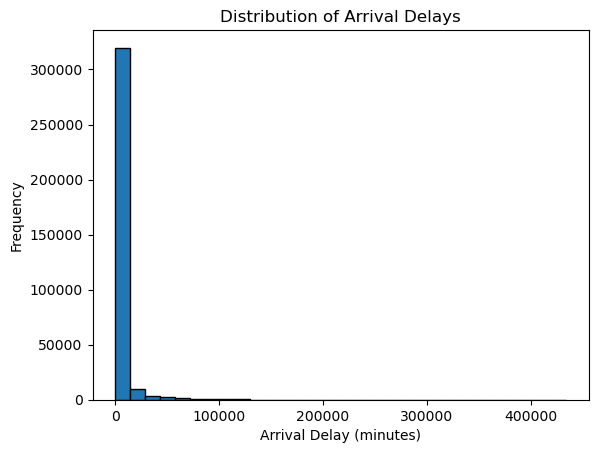

In [127]:
import matplotlib.pyplot as plt

# Plotting histogram
plt.hist(df['arr_delay'], bins=30, edgecolor='black')

# Adding labels and title
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delays')

# Display the plot
plt.show()


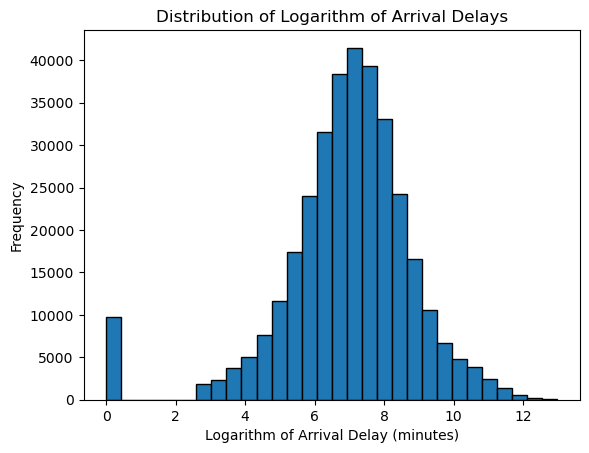

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Applying a logarithmic transformation to 'arr_delay' data
log_arr_delay = np.log1p(df['arr_delay'])

# Plotting histogram for the transformed data
plt.hist(log_arr_delay, bins=30, edgecolor='black')

# Adding labels and title
plt.xlabel('Logarithm of Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Arrival Delays')

# Display the plot
plt.show()


#### Observation: Major delay is around mean but the first bar standing out from the normal distribution says about extreme outliers

#### 2. Question: How many flights are delayed by each carrier?

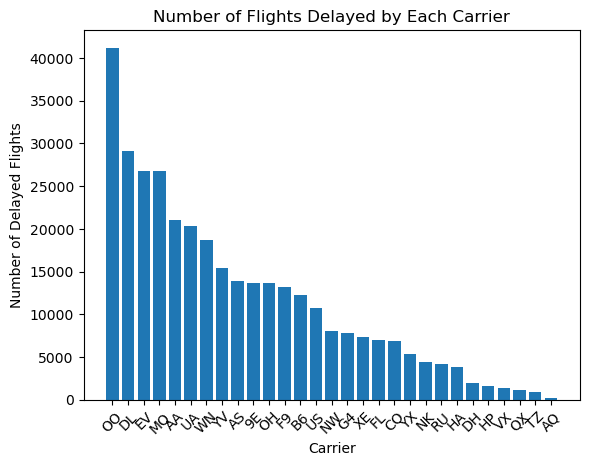

In [129]:
import matplotlib.pyplot as plt

# Counting delayed flights per carrier
carrier_delay_counts = df['carrier'].value_counts()

# Plotting bar chart
plt.bar(carrier_delay_counts.index, carrier_delay_counts.values)

# Adding labels and title
plt.xlabel('Carrier')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Flights Delayed by Each Carrier')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


#### Observation: Carriers with the highest delay occurrences is OO

#### 3. Question: What are the major causes of delays?

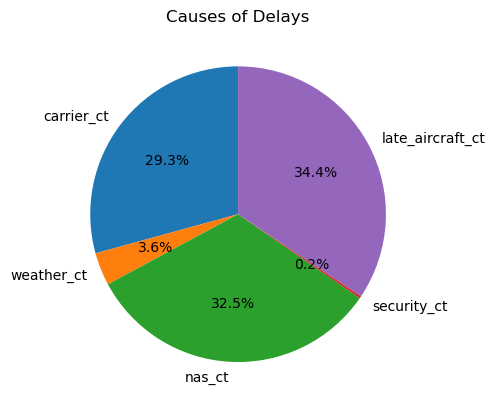

In [130]:
import matplotlib.pyplot as plt

# Summing up delay counts by delay type
delay_counts = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

# Labels for the pie chart
labels = delay_counts.index

# Plotting pie chart
plt.pie(delay_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Adding title
plt.title('Causes of Delays')

# Display the plot
plt.show()


#### Observation: The pie chart represents the proportion of delays caused by different factors, such as weather, carrier, NAS (National Airspace System), security, and late aircraft. late_aircraft_ct has maximum flights delayed due to this reason

#### 4. Question: What is the distribution of delays caused by different factors?


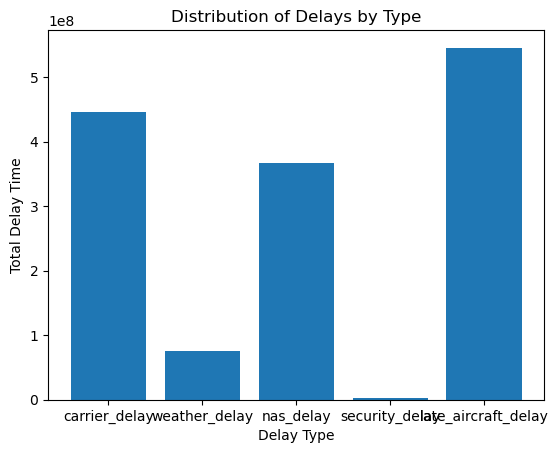

In [131]:
import matplotlib.pyplot as plt

# Summing up delay counts by delay type
delay_counts = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()

# Labels for the stacked bar chart
labels = delay_counts.index

# Plotting stacked bar chart
plt.bar(labels, delay_counts)

# Adding labels and title
plt.xlabel('Delay Type')
plt.ylabel('Total Delay Time')
plt.title('Distribution of Delays by Type')

# Display the plot
plt.show()


#### Observation: A stacked bar chart can show the proportion of delays caused by different factors such as weather, carrier, NAS, security, and late aircraft, providing insights into the major contributors to delays. Aircraft_delay caused major delay in terms of time taken

#### 5. Question: How does the number of flights vary across different months or years?

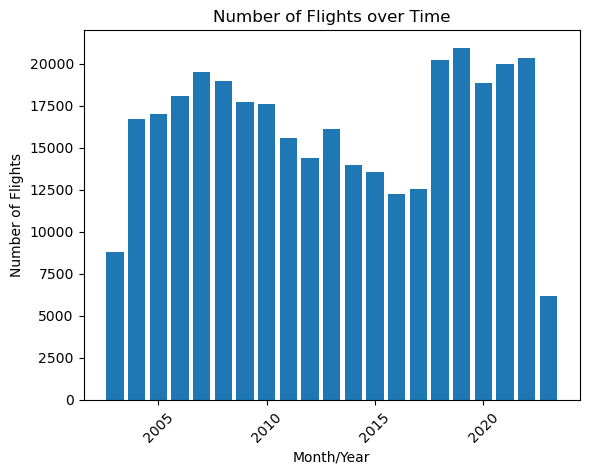

In [132]:
import matplotlib.pyplot as plt

# Counting flights per month or year
month_counts = df['year'].value_counts().sort_index()

# Plotting line plot or bar chart

plt.bar(month_counts.index, month_counts.values)

# Adding labels and title
plt.xlabel('Month/Year')
plt.ylabel('Number of Flights')
plt.title('Number of Flights over Time')

# Rotating x-axis labels for better readability (if using a bar chart)
plt.xticks(rotation=45)

# Display the plot
plt.show()


#### Observation: 2019 has maximum number of flights

#### 6. Question: What is the distribution of the number of cancelled flights?

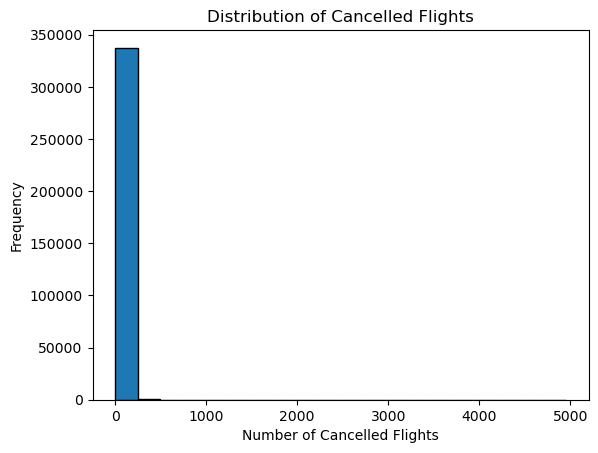

In [133]:
import matplotlib.pyplot as plt

# Plotting histogram for 'arr_cancelled'
plt.hist(df['arr_cancelled'], bins=20, edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Frequency')
plt.title('Distribution of Cancelled Flights')

# Display the plot
plt.show()


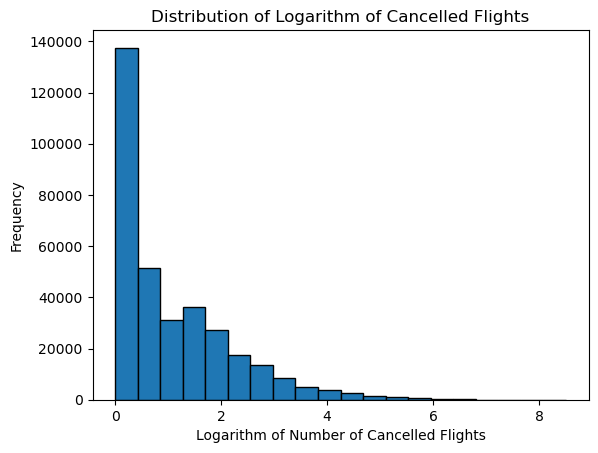

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Applying a logarithmic transformation to 'arr_cancelled' data with an offset
log_arr_cancelled = np.log1p(df['arr_cancelled'])

# Plotting histogram for the transformed data
plt.hist(log_arr_cancelled, bins=20, edgecolor='black')

# Adding labels and title
plt.xlabel('Logarithm of Number of Cancelled Flights')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Cancelled Flights')

# Display the plot
plt.show()


#### observation: Most flights are not cancelled: The high frequency in the range from 0 to 2 suggests that the majority of flights in the dataset are not cancelled. This is expected since flight cancellations are relatively uncommon compared to the total number of flights.

#### 7. Question: What is the distribution of the number of diverted flights?


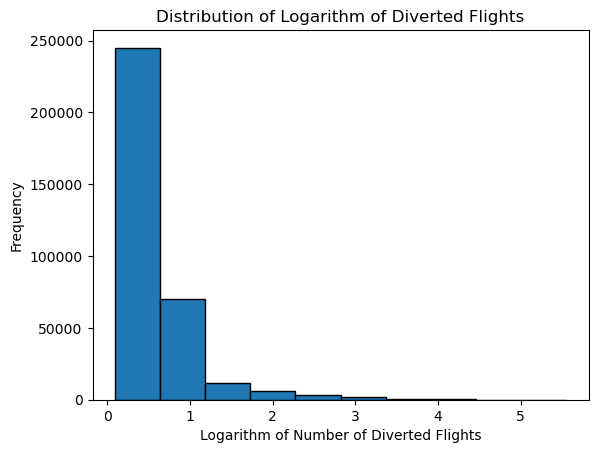

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Adding a small constant value to 'arr_diverted' data
small_constant = 0.1
arr_diverted_modified = df['arr_diverted'] + small_constant

# Applying a logarithmic transformation to the modified data
log_arr_diverted = np.log1p(arr_diverted_modified)

# Plotting histogram for the transformed data
plt.hist(log_arr_diverted, bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Logarithm of Number of Diverted Flights')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Diverted Flights')

# Display the plot
plt.show()


#### observation: Most flights are not cancelled: The high frequency in the range from 0 to 1 suggests that the majority of flights in the dataset are not diverted. This is expected since flight divertions are relatively uncommon compared to the total number of flights.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. distribution of arrival delays
> 2. cancelled flights
> 3. diverted flights

All above are highly skewed data where we need to perform trnsformations
This can also include multimodel distribution or extreme outliers. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Applied logarithmic transformations on all of the highly skewed data

# Bivarate Explorations


#### 8. Question: How does the arrival delay vary with the month of the year?


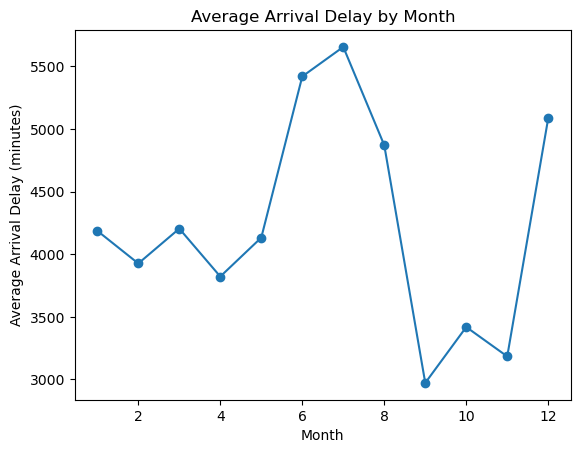

In [136]:
import matplotlib.pyplot as plt

# Grouping the data by month and calculating the average arrival delay
average_delay_by_month = df.groupby('month')['arr_delay'].mean()

# Plotting the line plot
plt.plot(average_delay_by_month.index, average_delay_by_month.values, marker='o')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Month')

# Display the plot
plt.show()


#### Observation: The line plot shows how the average arrival delay changes across different months, allowing us to identify any seasonal patterns or trends.

#### 9. Question: How does the number of delayed flights vary by month?

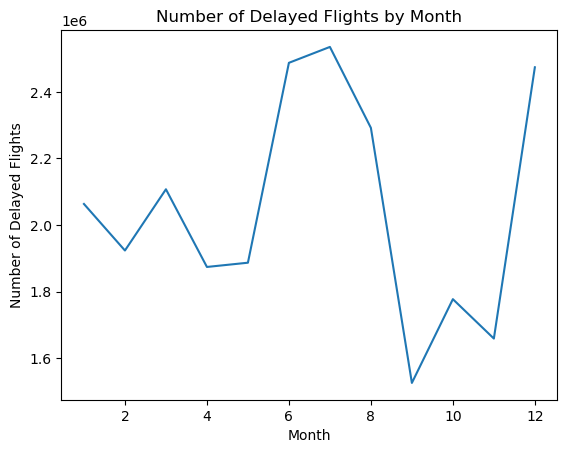

In [137]:
import matplotlib.pyplot as plt

# Grouping the dataset by month and calculating the total number of delayed flights
delayed_flights_by_month = df.groupby('month')['arr_del15'].sum()

# Plotting the line plot
plt.plot(delayed_flights_by_month.index, delayed_flights_by_month.values)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Month')

# Display the plot
plt.show()


#### Observation: The line plot shows the trend in the number of delayed flights over different months, providing insights into any seasonality or patterns in delays.

#### 10. What is the relationship between arrival delays and the number of flights?

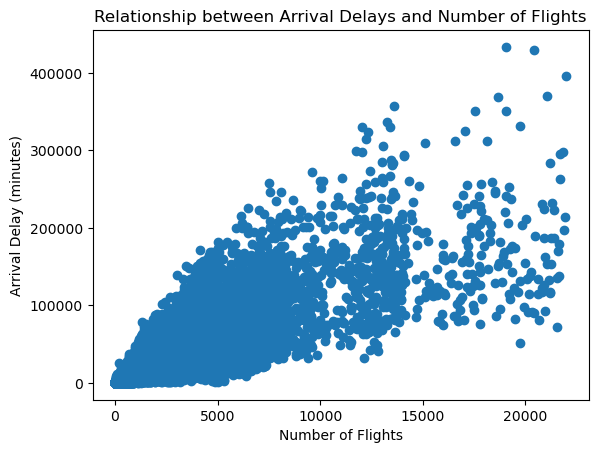

In [138]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(df['arr_flights'], df['arr_delay'])

# Adding labels and title
plt.xlabel('Number of Flights')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Relationship between Arrival Delays and Number of Flights')

# Display the plot
plt.show()


#### Observation: The scatter plot displays the relationship between arrival delays and the total number of flights, helping to identify any correlation or patterns between these variables.

#### 11.Question: How does the distribution of arrival delays vary for different carriers?

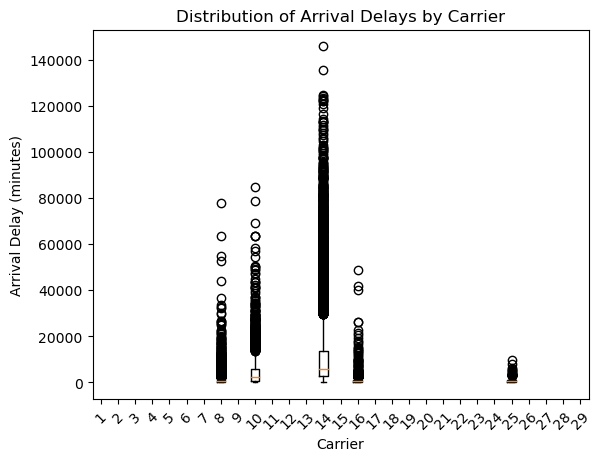

In [139]:
import matplotlib.pyplot as plt

# Creating a box plot of arrival delays by carrier
plt.boxplot([df.loc[df['carrier'] == c, 'arr_delay'] for c in df['carrier'].unique()])

# Adding labels and title
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Distribution of Arrival Delays by Carrier')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


#### 12.Question: Is there a correlation between the total number of flights and the number of delayed flights for each carrier?

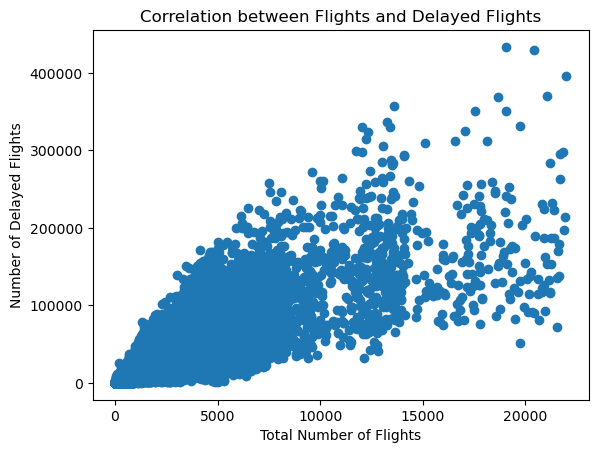

In [140]:
import matplotlib.pyplot as plt

# Creating the scatter plot
plt.scatter(df['arr_flights'], df['arr_delay'])

# Adding labels and title
plt.xlabel('Total Number of Flights')
plt.ylabel('Number of Delayed Flights')
plt.title('Correlation between Flights and Delayed Flights')

# Display the plot
plt.show()


#### 13.Question: How do delays vary by month and carrier?

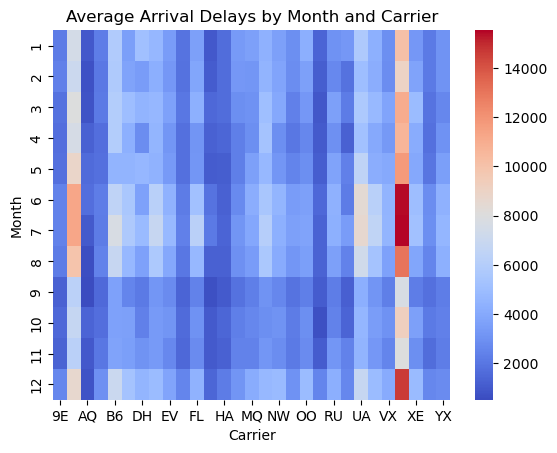

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a pivot table to calculate average delays by month and carrier
pivot_table = df.pivot_table(values='arr_delay', index='month', columns='carrier', aggfunc='mean')

# Creating a heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, fmt=".1f")

# Adding labels and title
plt.xlabel('Carrier')
plt.ylabel('Month')
plt.title('Average Arrival Delays by Month and Carrier')

# Display the plot
plt.show()


#### 14.Question: What is the relationship between different delay types?

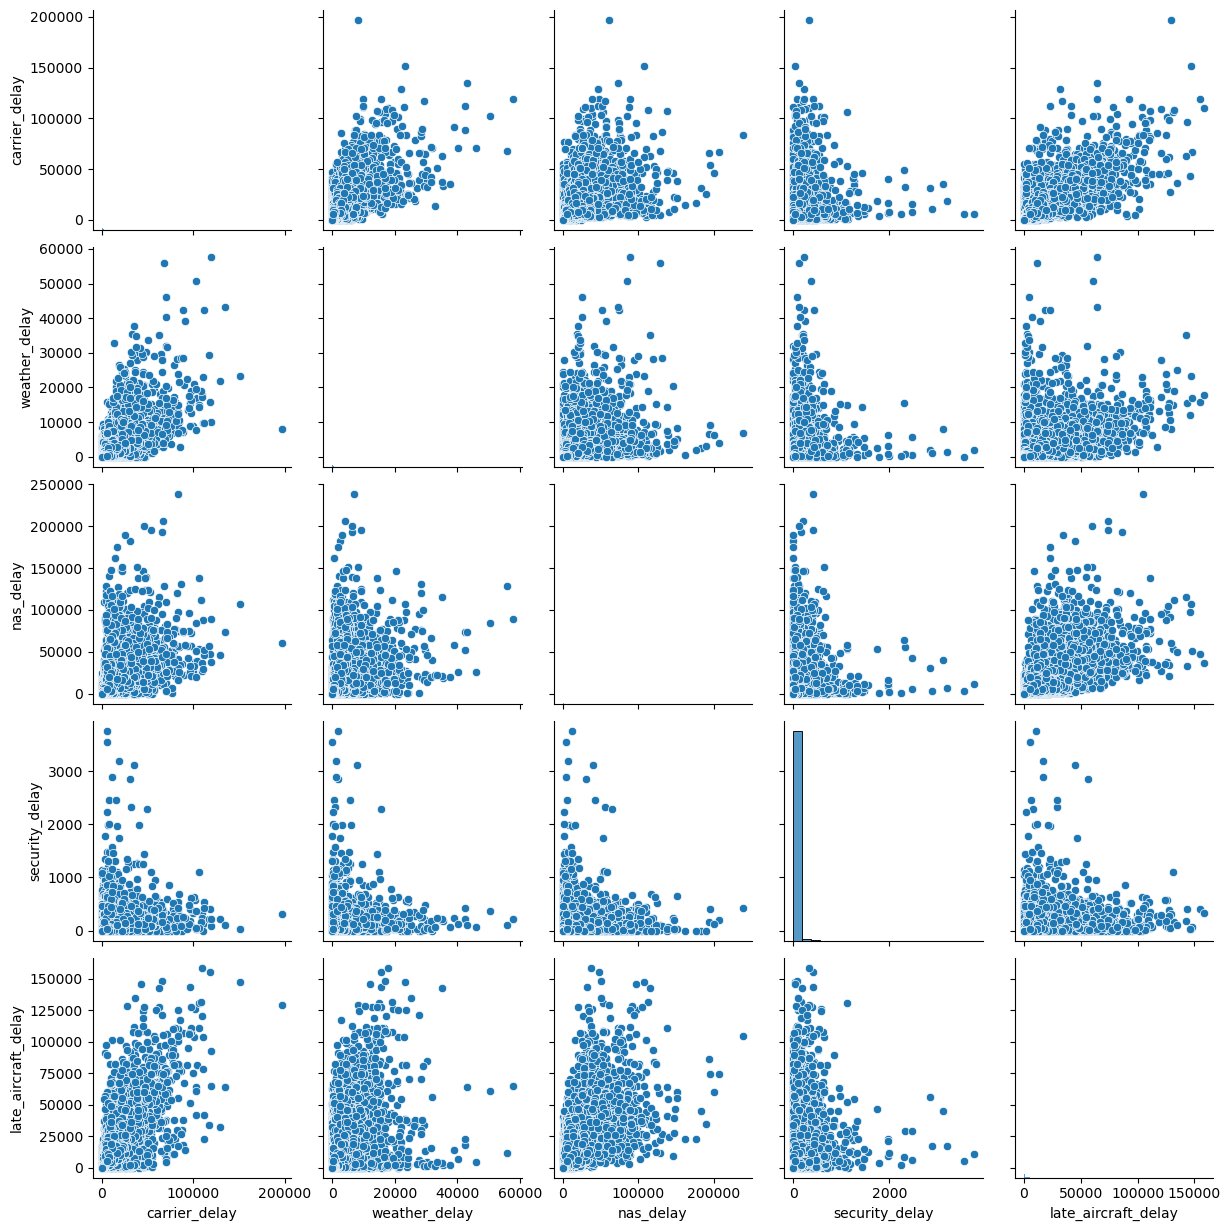

In [142]:
import seaborn as sns

# Selecting the columns for delay types
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Creating a scatter plot matrix
sns.pairplot(data=df, vars=delay_types)

# Display the plot
plt.show()


#### 15.Question: Is there any relationship between the number of cancelled flights and the number of diverted flights? Does an increase in one category correlate with an increase or decrease in the other category?

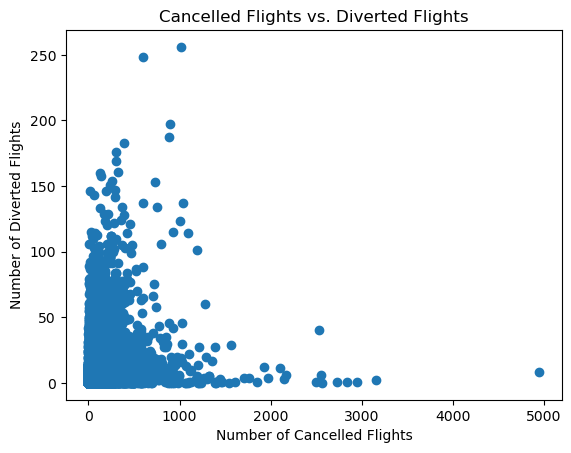

In [143]:
import matplotlib.pyplot as plt

# Scatter plot of 'arr_cancelled' vs. 'arr_diverted'
plt.scatter(df['arr_cancelled'], df['arr_diverted'])

# Adding labels and title
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Number of Diverted Flights')
plt.title('Cancelled Flights vs. Diverted Flights')

# Display the plot
plt.show()


#### 16. Question: Is there any relationship between the number of cancelled flights and the weather delay? Do higher numbers of cancelled flights coincide with longer weather delays?

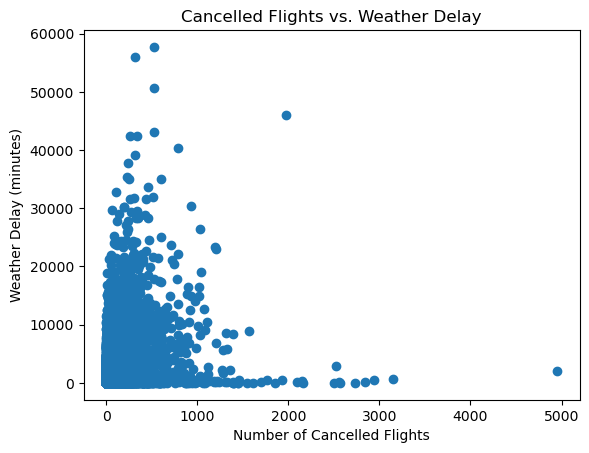

In [146]:
import matplotlib.pyplot as plt

# Scatter plot of 'arr_cancelled' vs. 'weather_delay'
plt.scatter(df['arr_cancelled'], df['weather_delay'])

# Adding labels and title
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Weather Delay (minutes)')
plt.title('Cancelled Flights vs. Weather Delay')

# Display the plot
plt.show()


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

The distribution of arrival delays shows a skewness towards higher delay values, with a potential presence of extreme outliers.
The number of delayed flights varies among carriers, with carrier "OO" having the highest number of delays.
The major causes of delays are related to late aircraft arrivals, followed by NAS delays and carrier delays.
There is a positive correlation between the number of cancelled flights and diverted flights, indicating that disruptions leading to cancellations may also result in flights being diverted.
The distribution of arrival delays varies by carrier, with some carriers experiencing higher delays compared to others.
There is a positive correlation between the total number of flights and the number of delayed flights, suggesting that higher flight volumes can contribute to increased delays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!
Yes, there can be interesting relationships between non-main features in the dataset that are worth exploring. Here are a few potential relationships to consider:


1. Relationship between Delay Types and Cancellation: Exploring the relationship between different delay types (such as carrier-related delays, weather delays, etc.) and the number of flight cancellations can help understand if certain types of delays are more likely to result in cancellations. This analysis can provide insights into the impact of specific delay factors on flight operations and decision-making.


2. Relationship between Delay Types: Analyzing the relationship between different delay types (carrier-related, weather-related, etc.) can provide insights into the interplay between these factors. For example, understanding if carrier-related delays often occur alongside weather delays or if they are relatively independent can help identify areas for improvement or potential mitigation strategies.



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### 17.Question: How do the number of flight cancellations vary across different months for different carriers? Are there any specific carriers or months with higher numbers of cancellations?

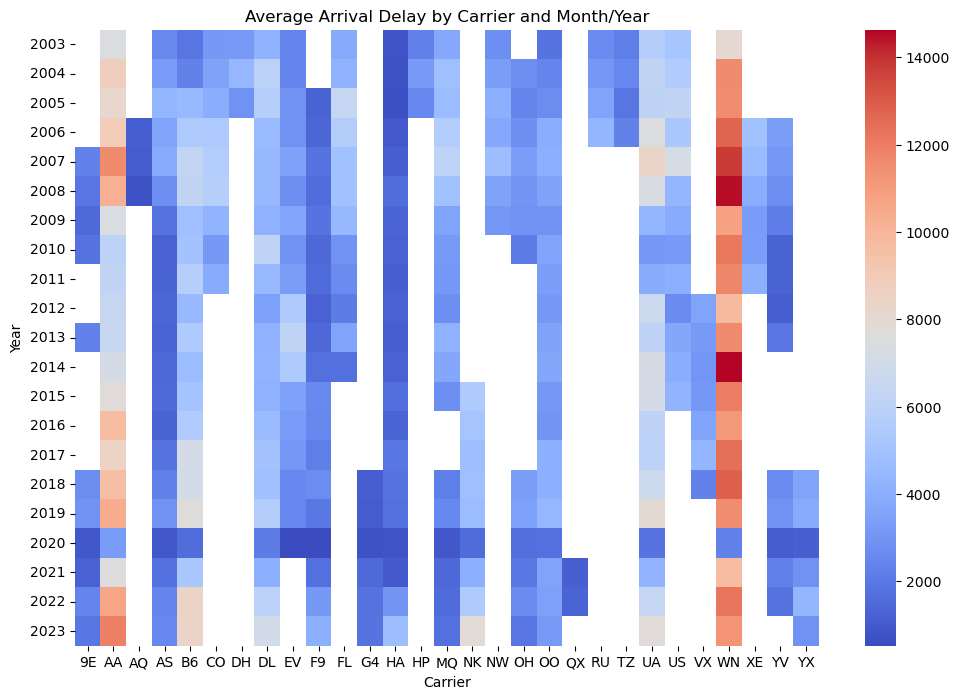

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by carrier and month/year and calculating the average arrival delay
average_delay_by_carrier_month = df.groupby(['carrier', 'year'])['arr_delay'].mean().reset_index()

# Creating a pivot table to reshape the data for visualization
pivot_table = average_delay_by_carrier_month.pivot('year', 'carrier', 'arr_delay')

# Plotting a heatmap to visualize the average arrival delay by carrier and month/year
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, fmt=".1f")

# Adding labels and title
plt.xlabel('Carrier')
plt.ylabel('Year')
plt.title('Average Arrival Delay by Carrier and Month/Year')

# Display the plot
plt.show()


#### Observation: AA, WN are carriers where flights are mostly delayed ;2023 and 2007 year had more delays by above carriers

#### 18.Question: How do the number of flight cancellations vary across different months for different carriers? Are there any specific carriers or months with higher numbers of cancellations?

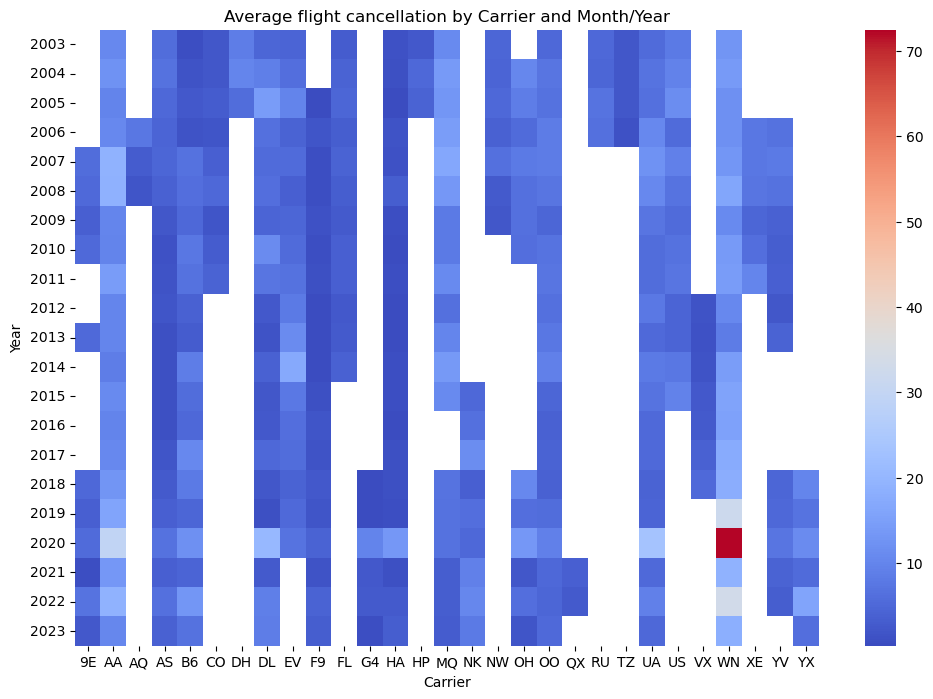

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by carrier and month/year and calculating the average arrival delay
average_delay_by_carrier_month = df.groupby(['carrier', 'year'])['arr_cancelled'].mean().reset_index()

# Creating a pivot table to reshape the data for visualization
pivot_table = average_delay_by_carrier_month.pivot('year', 'carrier', 'arr_cancelled')

# Plotting a heatmap to visualize the average arrival delay by carrier and month/year
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, fmt=".1f")

# Adding labels and title
plt.xlabel('Carrier')
plt.ylabel('Year')
plt.title('Average flight cancellation by Carrier and Month/Year')

# Display the plot
plt.show()


#### Observation: Usually cancellations are very rare but some are caused by WN carrier

#### 19.Question: What is the relationship between the total number of flights, the number of delayed flights, and the number of cancellations?


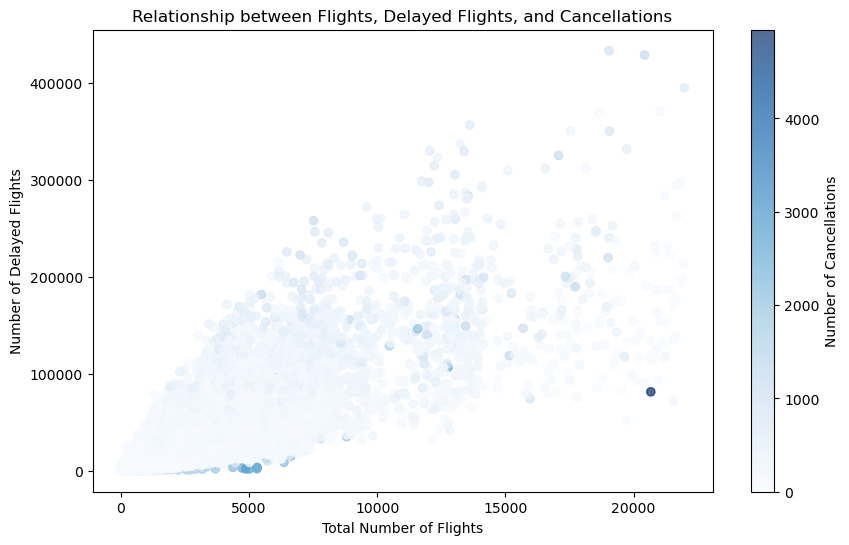

In [158]:
import matplotlib.pyplot as plt

# Creating a scatter plot with three variables: 'arr_flights', 'arr_del15', and 'arr_cancelled'
plt.figure(figsize=(10, 6))
plt.scatter(df['arr_flights'], df['arr_delay'], c=df['arr_cancelled'], cmap='Blues', alpha=0.7)
plt.colorbar(label='Number of Cancellations')
plt.xlabel('Total Number of Flights')
plt.ylabel('Number of Delayed Flights')
plt.title('Relationship between Flights, Delayed Flights, and Cancellations')
plt.show()


#### Observation: The scatter plot visualizes the relationship between the total number of flights, the number of delayed flights, and the number of cancellations. The color gradient represents the number of cancellations, providing additional information on the intensity of cancellations for different combinations of flight counts and delay counts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?



1. The heatmap of flight cancellations by year and carrier revealed interesting patterns. Certain carriers had higher numbers of cancellations in specific months, indicating potential operational challenges or external factors affecting those carriers more during certain times of the year.

2. The scatter plot of total flights, delayed flights, and cancellations provided insights into the relationship between these variables. It showed that higher numbers of delayed flights and cancellations tended to occur when the total number of flights was also high, suggesting that increased flight volume can contribute to both delays and cancellations.

3. The heatmap of average arrival delays by year and carrier helped identify carriers or months with higher or lower average delays. It revealed that certain carriers consistently had higher average delays across all months, indicating potential issues with those carriers' operations or infrastructure. Additionally, it highlighted months with higher average delays, suggesting seasonal patterns in delays.



### Were there any interesting or surprising interactions between features?

> Only WN carrier has cancellations

## Conclusions

Conclusion:

In this data exploration, we analyzed a large dataset on airline delay causes spanning 20 years from 2003 to 2023. We focused on various features such as arrival delays, carrier information, delay types, flight counts, cancellations, and diversions to gain insights into the factors contributing to delays and the overall airline operations.

Our analysis revealed several key findings:

1. Arrival Delays: The distribution of arrival delays was skewed towards higher delay values, indicating potential outliers. Applying a logarithmic transformation helped normalize the distribution and improve interpretability.

2. Delayed Flights by Carrier: Different carriers had varying numbers of delayed flights, with carrier "OO" having the highest frequency of delays. This suggests that certain carriers may have operational issues or challenges leading to more delays.

3. Causes of Delays: The major causes of delays were late aircraft arrivals, followed by NAS delays and carrier delays. Weather-related delays and security-related delays had relatively smaller contributions. Understanding these delay factors can help airlines identify areas for improvement and implement targeted strategies to reduce delays.

4. Delay Distribution by Type: Late aircraft delays had the highest total delay time, followed by NAS delays and carrier delays. Weather-related delays and security-related delays had a relatively smaller impact in terms of delay time. This highlights the importance of addressing late aircraft arrivals to minimize overall delay time.

5. Flights over Time: The number of flights varied across different months and years. In particular, 2019 had the highest number of flights in the dataset. This information can be useful for airlines to understand demand patterns and allocate resources accordingly.

6. Cancellations: Most flights in the dataset were not canceled, as indicated by the high frequency of zero or low cancellation counts. Flight cancellations were relatively uncommon compared to the total number of flights. WN carrier had the most cancellations compared to other carriers.

7. Diverted Flights: Similar to cancellations, the majority of flights were not diverted, with relatively low frequencies of flight diversions compared to the total number of flights. This suggests that diversions are infrequent events in airline operations.

Throughout the data exploration process, we performed univariate, bivariate, and multivariate analyses to uncover relationships and patterns in the data. We applied logarithmic transformations to skewed data, which improved the interpretability of distributions. Visualizations such as histograms, bar charts, line plots, heatmaps, and scatter plots aided in understanding the relationships between variables and identifying trends.

Overall, this exploration provides valuable insights into the factors contributing to airline delays, the variations in delays by carrier and month, the relationship between delays and flight volumes, and the occurrence of cancellations and diversions. These findings can inform airlines' decision-making processes, resource allocation strategies, and efforts to improve operational efficiency and customer satisfaction.
